# ENCODE bigWig analysis questions

Do your best to answer all parts of each question. You are encouraged to collaborate, but should turn in your own answers. 

Please limit each answer to a maximum of one markdown cell, one code cell and one plot. 

Put helper functions into a separate script (e.g. `hwutils.py`) so the notebook can be focused on plotting. Also see the [workshop on Clean Code](https://drive.google.com/file/d/1TraVwRkbkCbHq-s_-NS69ZEbRNwH8XNh/view) from Dan Larremore (https://larremorelab.github.io/slides/) for good coding tips to use in this assignment.


<span style='color:Blue'> 
    Collaborators: Hanyi Wang, Cecilia Liu, Yumin Wang
</span>

In [43]:
# useful libraries to import

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b') 
# nice way to format ticks as human-readable: ax.xaxis.set_major_formatter(bp_formatter)

from hwutils import *

import colorsys

In [44]:
# load dataFrame of bigWigs from ENCODE (encodeproject.org/), binned to 10kb resolution across chromosome 10.
# note that the first three columns are chrom,start,end and the other columns are labeled by bigWig file accession.
df = pd.read_table('./data/ENCODE_GRCh38_binned_subset.tsv')

# load metadata from ENCODE for bigwig files. 
# can be queried as follows: bigwig_metadata.query("`File accession`==@ df_column_name ")
bigwig_metadata = pd.read_table('./data/ENCODE_GRCh38_bigWig_metadata.tsv')

/var/folders/gh/wjs3pzl11758g8crdf96rf8c0000gn/T/ipykernel_22549/1708817607.py:7: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  bigwig_metadata = pd.read_table('./data/ENCODE_GRCh38_bigWig_metadata.tsv')


- After loading the data (above), and visualize some of the profiles. Why might many signals dip on chr10 at around 40Mb?


In [45]:
df

chrom      start        end  ENCFF230YBR  ENCFF953CVO  ENCFF520IHF  \
0      chr10          0      10000     0.000000     0.000000     0.000000   
1      chr10      10000      20000     0.016585     0.141369     0.000000   
2      chr10      20000      30000     0.000000     0.000000     0.000000   
3      chr10      30000      40000     0.000000     0.023561     0.000000   
4      chr10      40000      50000     0.049756     0.094244     0.052176   
...      ...        ...        ...          ...          ...          ...   
13375  chr10  133750000  133760000     0.000000     0.000000     0.000000   
13376  chr10  133760000  133770000     0.063296     0.094244     0.013765   
13377  chr10  133770000  133780000     0.000000     0.000000     0.000000   
13378  chr10  133780000  133790000     0.101037     0.140481     0.009106   
13379  chr10  133790000  133797422     0.000000     0.000000     0.000000   

       ENCFF730SPR  ENCFF559YWA  ENCFF640PJT  ENCFF919FBG  ...  ENCFF418EBS  \
0         0.000000     0.000000     0.000000     0.000000  ...     0.000000   
1         0.092070     0.048068     0.006080     0.029362  ...     0.074162   
2         0.041850     0.010681     0.000000     0.000000  ...     0.018541   
3         0.008370     0.000000     0.000000     0.000000  ...     0.000000   
4         0.442616     0.181287     0.009625     0.142758  ...     0.055622   
...            ...          ...          ...          ...  ...          ...   
13375     0.000000     0.000000     0.000000     0.000000  ...     0.000000   
13376     0.209718     0.074772     0.006080     0.106795  ...     0.217829   
13377     0.015506     0.000000     0.000000     0.000000  ...     0.000000   
13378     0.078761     0.066394     0.000000     0.018634  ...     0.120245   
13379     0.000000     0.000000     0.000000     0.000000  ...     0.000000   

       ENCFF270BHF  ENCFF365EIN  ENCFF321AHD  ENCFF595QZS  ENCFF303MWS  \
0         0.000000     0.000000     0.000000     0.000000     0.000000   
1         0.033137     0.105691     0.000000     0.000000     0.045821   
2         0.000000     0.000000     0.000000     0.000000     0.000000   
3         0.000000     0.000000     0.000000     0.000000     0.000000   
4         0.234655     0.156918     0.072464     0.028221     0.274925   
...            ...          ...          ...          ...          ...   
13375     0.000000     0.000000     0.000000     0.000000     0.000000   
13376     0.159084     0.014484     0.000000     0.000000     0.130731   
13377     0.013125     0.000000     0.000000     0.000000     0.000000   
13378     0.058105     0.300129     0.000000     0.000000     0.080950   
13379     0.000000     0.000000     0.000000     0.000000     0.000000   

       ENCFF907FVJ  ENCFF567WCU  ENCFF423TVA  ENCFF308KWQ  
0         0.000000     0.000000     0.000000          0.0  
1         0.034791     0.000000     0.000000          0.0  
2         0.000000     0.000000     0.000000          0.0  
3         0.000000     0.000000     0.000000          0.0  
4         0.138100     0.025495     0.073522          0.0  
...            ...          ...          ...          ...  
13375     0.000000     0.000000     0.000000          0.0  
13376     0.072167     0.000000     0.000000          0.0  
13377     0.000000     0.000000     0.000000          0.0  
13378     0.088405     0.000000     0.000000          0.0  
13379     0.000000     0.000000     0.000000          0.0  

[13380 rows x 203 columns]

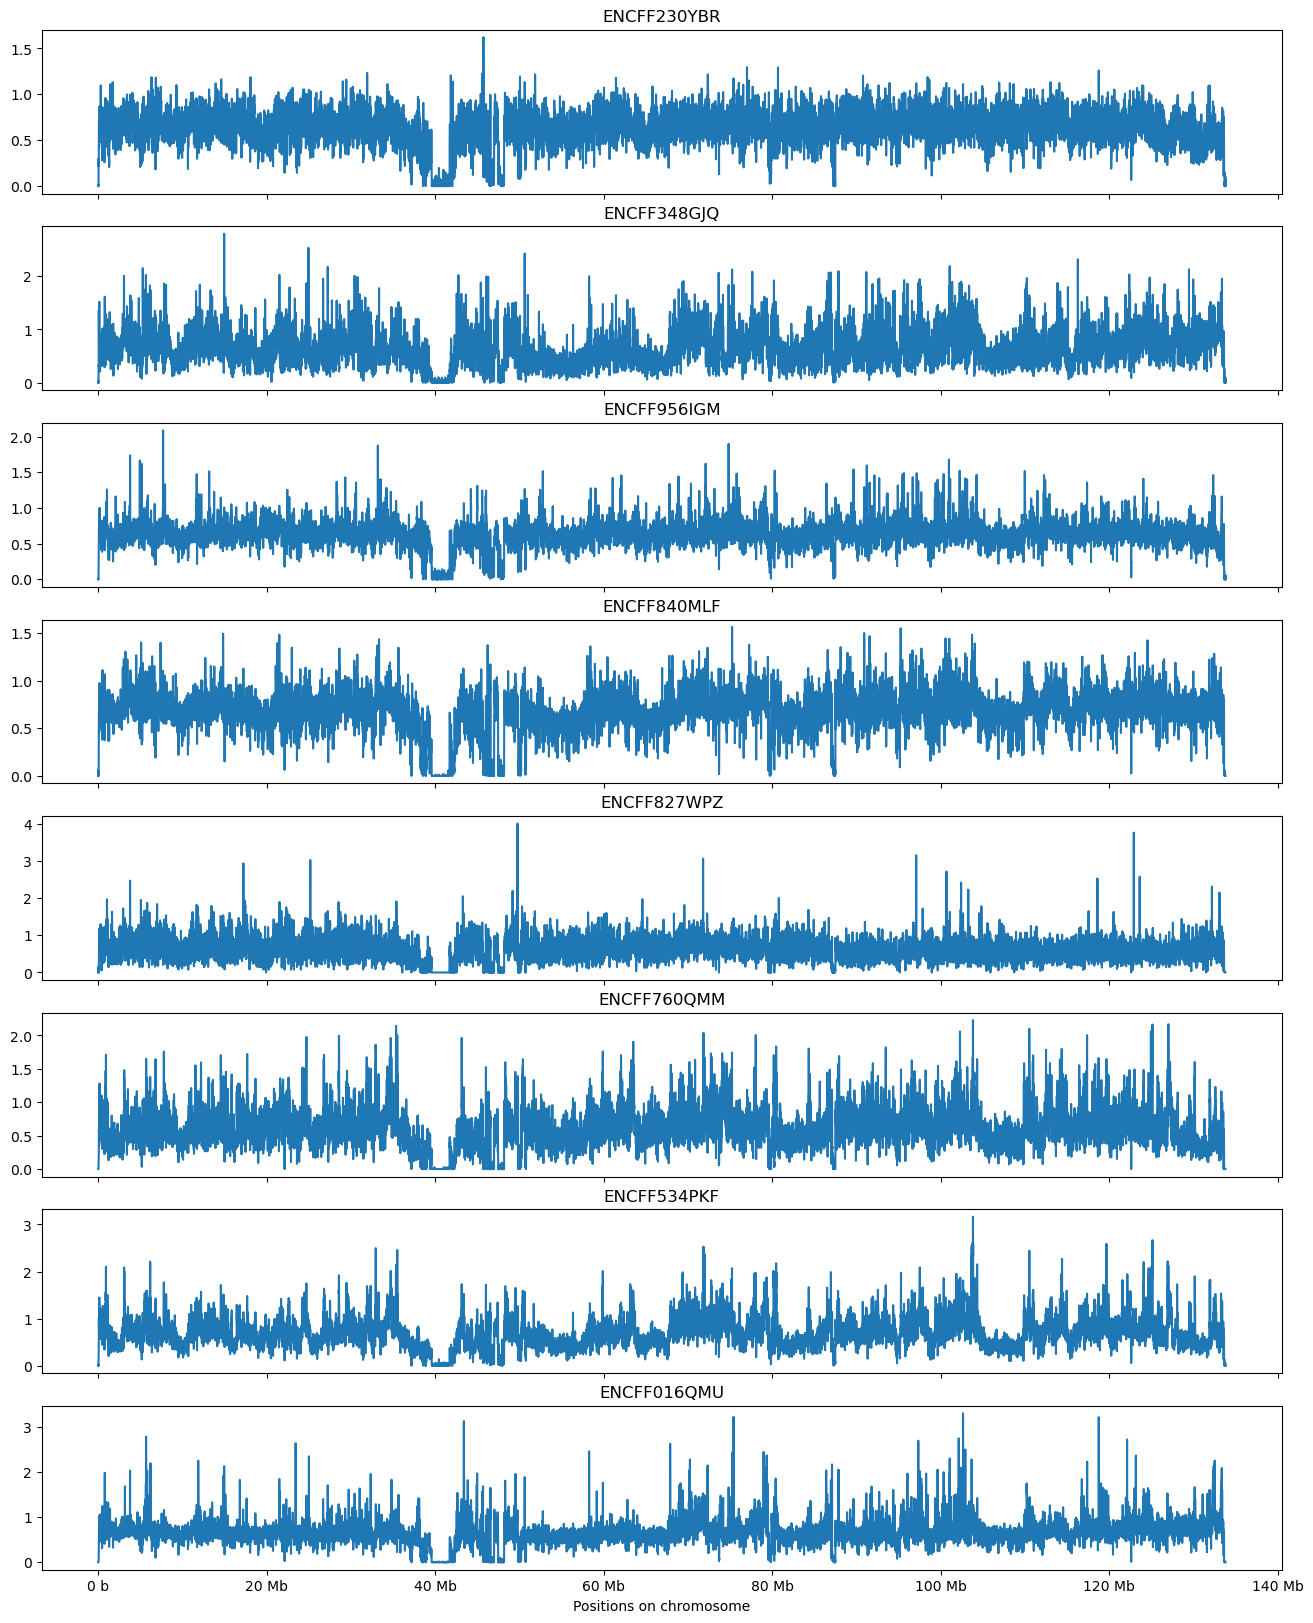

In [7]:
profiles = df.columns[3:]
# select 8 profiles to be visualized
profiles_selected = [profiles[len(profiles) // 8 * i] for i in range(8)]

fig, axs = plt.subplots(8, figsize = (16, 20), sharex = True)
for i in range(8):
    profile = profiles_selected[i]
    axs[i].plot(df['start'], df[profile])
    axs[i].set_title(profile)
    axs[i].xaxis.set_major_formatter(bp_formatter)
axs[7].set(xlabel='Positions on chromosome')
    
plt.show()

<span style='color:Blue'> 
    Many signals dip on chr10 at around 40Mb, because the centromere on chr10 is around 40Mb.
</span>

- Use scikit-learn to perform PCA, and make a scatterplot of PC1 vs PC2.


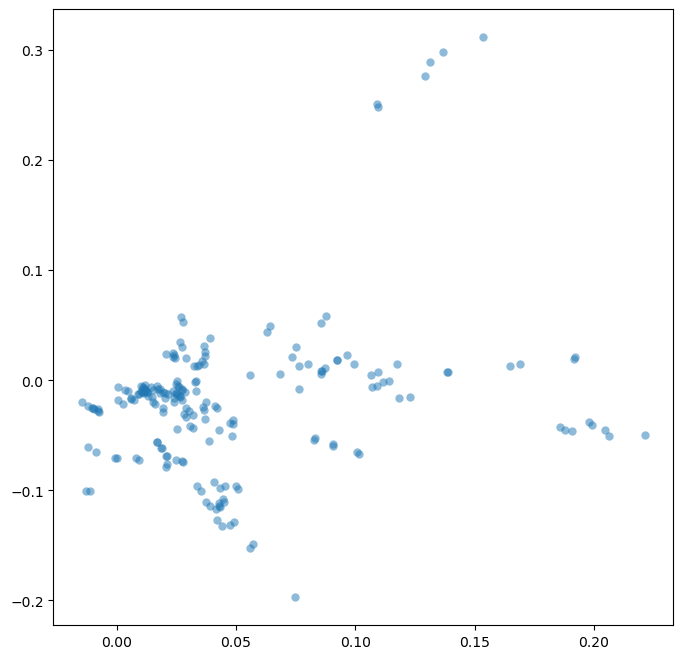

In [9]:
df_signals = df.iloc[:, 3:]
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df_signals)

plot_pca(pca)

- Try to use the experiment metadata to understand and remove outliers. Try labeling or coloring points by various metadata columns. Were any columns in the metadata useful for outlier removal? Note that `sklearn.preprocessing.LabelEncoder()` can be useful for transforming text strings to categories, and `plt.text` can be used to overlay labels with points.

In [12]:
bigwig_metadata

Unnamed: 0 File accession File format File type  File format type  \
0              38    ENCFF298EKM      bigWig    bigWig               NaN   
1              39    ENCFF599PYU      bigWig    bigWig               NaN   
2              40    ENCFF393FQJ      bigWig    bigWig               NaN   
3              41    ENCFF528ORD      bigWig    bigWig               NaN   
4              42    ENCFF911FWI      bigWig    bigWig               NaN   
...           ...            ...         ...       ...               ...   
90822      703035    ENCFF319PNN      bigWig    bigWig               NaN   
90823      703036    ENCFF995WZQ      bigWig    bigWig               NaN   
90824      703041    ENCFF765CVX      bigWig    bigWig               NaN   
90825      703042    ENCFF706QAR      bigWig    bigWig               NaN   
90826      703043    ENCFF329WRM      bigWig    bigWig               NaN   

                    Output type File assembly Experiment accession  \
0                signal p-value        GRCh38          ENCSR000ANO   
1                signal p-value        GRCh38          ENCSR000ANO   
2                signal p-value        GRCh38          ENCSR000ANO   
3      fold change over control        GRCh38          ENCSR000ANO   
4      fold change over control        GRCh38          ENCSR000ANO   
...                         ...           ...                  ...   
90822  fold change over control        GRCh38          ENCSR461MQX   
90823  fold change over control        GRCh38          ENCSR461MQX   
90824            signal p-value        GRCh38          ENCSR461MQX   
90825  fold change over control        GRCh38          ENCSR461MQX   
90826            signal p-value        GRCh38          ENCSR461MQX   

             Assay                                           Donor(s)  ...  \
0      TF ChIP-seq                         /human-donors/ENCDO156MSV/  ...   
1      TF ChIP-seq                         /human-donors/ENCDO269AAA/  ...   
2      TF ChIP-seq  /human-donors/ENCDO156MSV/, /human-donors/ENCD...  ...   
3      TF ChIP-seq                         /human-donors/ENCDO269AAA/  ...   
4      TF ChIP-seq  /human-donors/ENCDO156MSV/, /human-donors/ENCD...  ...   
...            ...                                                ...  ...   
90822  TF ChIP-seq                         /human-donors/ENCDO000AAZ/  ...   
90823  TF ChIP-seq                         /human-donors/ENCDO000AAZ/  ...   
90824  TF ChIP-seq                         /human-donors/ENCDO000AAZ/  ...   
90825  TF ChIP-seq                         /human-donors/ENCDO000AAZ/  ...   
90826  TF ChIP-seq                         /human-donors/ENCDO000AAZ/  ...   

      Genome annotation Platform Controlled by File Status  \
0                   NaN      NaN           NaN    released   
1                   NaN      NaN           NaN    released   
2                   NaN      NaN           NaN    released   
3                   NaN      NaN           NaN    released   
4                   NaN      NaN           NaN    released   
...                 ...      ...           ...         ...   
90822               NaN      NaN           NaN    released   
90823               NaN      NaN           NaN    released   
90824               NaN      NaN           NaN    released   
90825               NaN      NaN           NaN    released   
90826               NaN      NaN           NaN    released   

                                                  s3_uri  \
0      s3://encode-public/2017/02/07/7220c4f7-ab3a-43...   
1      s3://encode-public/2017/02/07/27c489a3-e834-45...   
2      s3://encode-public/2017/02/07/86f9d2fb-ca91-40...   
3      s3://encode-public/2017/02/07/26e29d25-4dae-47...   
4      s3://encode-public/2017/02/07/450bbbc3-d0ba-45...   
...                                                  ...   
90822  s3://encode-public/2020/06/30/1f32734f-2d1d-4d...   
90823  s3://encode-public/2020/06/30/76bbe4b4-1ea0-40...   
90824  s3://encode-public/2020/

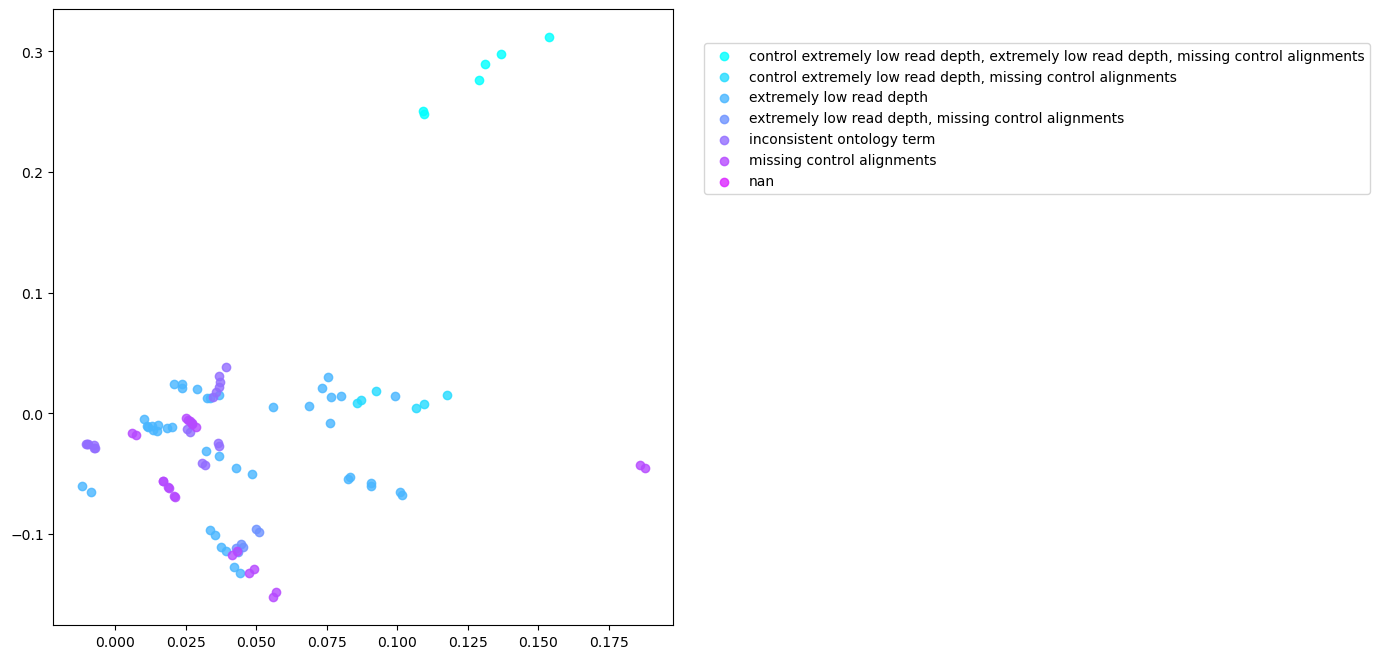

In [10]:
le, labels = get_labels(pca, bigwig_metadata, 'Audit ERROR')

n_colors = le.classes_.size
colors = [(x / n_colors, 1 - x / n_colors, 1) for x in range(n_colors)]

data = {'PC1': pca.components_[0], 'PC2': pca.components_[1], "label": labels}
df_0 = pd.DataFrame(data = data)

fig, ax = plt.subplots(figsize = (8, 8))

for i, l in enumerate(le.classes_):
    X = df_0[df_0.label == l].iloc[:,0]
    Y = df_0[df_0.label == l].iloc[:,1]
    ax.scatter(X, Y, color = colors[i], alpha = 0.8, label = l)
    
ax.legend(loc = (1.05, 0.7))
plt.show()

<span style='color:Blue'> 
    Column "Audit ERROR" seems to be useful for outlier removal. The points with PC2 > 0.2 (shown above in cyan) are probably outliers, as they are far away from most of the other points. Additionally, according to the information in the column "Audit ERROR", these points have "control extremely low read depth, extremely low read depth, missing control alignments," which represents the most severe errors of all the categories in the column.
</span>

- Which Assays or Experiment Targets show broad vs narrow patterns? Is this consistent across cell types? Does this relate to the patterns seen in PCA? One way to investigate the characteristic scale is by computing the autocorrelation.


In [ ]:
le1, labels1 = get_labels(pca, bigwig_metadata, "Assay")

n_colors1 = le1.classes_.size
colors1 = [(x / n_colors1, 1 - x / n_colors1, 1) for x in range(n_colors1)]

data_1 = {'PC1': pca.components_[0], 'PC2': pca.components_[1], "label": labels1}
df_1 = pd.DataFrame(data = data_1)

fig, axs = plt.subplots(2, figsize = (10, 16))

for i, l in enumerate(le1.classes_):
    X = df_1[df_1.label == l].iloc[:,0]
    Y = df_1[df_1.label == l].iloc[:,1]
    axs[0].scatter(X, Y, color = colors1[i], alpha = 0.8, label = l)
    
axs[0].legend()

le2, labels2 = get_labels(pca, bigwig_metadata, "Experiment target")

n_colors2 = le2.classes_.size
colors2 = [(x / n_colors2, 1 - x / n_colors2, 1) for x in range(n_colors2)]

data_2 = {'PC1': pca.components_[0], 'PC2': pca.components_[1], "label": labels2}
df_2 = pd.DataFrame(data = data_2)

for i, l in enumerate(le2.classes_):
    X = df_2[df_2.label == l].iloc[:,0]
    Y = df_2[df_2.label == l].iloc[:,1]
    axs[1].scatter(X, Y, color = colors2[i], alpha = 0.8, label = l)

axs[1].legend(loc = "upper left", ncols = 2)
plt.show()

- Which "Experiment Targets" (e.g. histone marks or transcription factors) for which cell types are nearby in this PC1 vs PC2 space? Do any of these proximities have plausible biological interpretations? For example, are any polycomb-related factors in proximity? Illustrate this in a plot.


- How much does preprocessing matter? Try normalizing the variance per track and see if you arrive at similar or distinct conclusions. Try removing the region on chr10 mentioned above. Note that `sklearn.preprocessing.StandardScaler` could be useful for preprocessing. 


In [72]:
df_clean_t

0         1      2         3         4         5         6      \
chrom        chr10     chr10  chr10     chr10     chr10     chr10     chr10   
start            0     10000  20000     30000     40000     50000     60000   
end          10000     20000  30000     40000     50000     60000     70000   
ENCFF230YBR    0.0  0.016585    0.0       0.0  0.049756  0.298538  0.218297   
ENCFF953CVO    0.0  0.141369    0.0  0.023561  0.094244   0.31669  0.363775   
...            ...       ...    ...       ...       ...       ...       ...   
ENCFF303MWS    0.0  0.045821    0.0       0.0  0.274925  0.366567  0.312181   
ENCFF907FVJ    0.0  0.034791    0.0       0.0    0.1381  0.290266  0.310043   
ENCFF567WCU    0.0       0.0    0.0       0.0  0.025495   0.04395  0.061343   
ENCFF423TVA    0.0       0.0    0.0       0.0  0.073522  0.084935  0.118167   
ENCFF308KWQ    0.0       0.0    0.0       0.0       0.0  0.055093       0.0   

                7         8         9      ...      13370      13371  \
chrom           chr10     chr10     chr10  ...      chr10      chr10   
start           70000     80000     90000  ...  133700000  133710000   
end             80000     90000    100000  ...  133710000  133720000   
ENCFF230YBR  0.433936  0.496646  0.716139  ...        0.0        0.0   
ENCFF953CVO  3.504568  0.616603  0.392589  ...        0.0        0.0   
...               ...       ...       ...  ...        ...        ...   
ENCFF303MWS  1.378816  1.195626   0.55722  ...        0.0        0.0   
ENCFF907FVJ  0.536893  0.446302  0.638873  ...        0.0        0.0   
ENCFF567WCU  1.835986  0.419484  0.355028  ...        0.0        0.0   
ENCFF423TVA  0.225185  0.537137   0.62843  ...        0.0        0.0   
ENCFF308KWQ  0.730493  0.141852  0.183365  ...        0.0        0.0   

                 13372      13373      13374      13375      13376      13377  \
chrom            chr10      chr10      chr10      chr10      chr10      chr10   
start        133720000  133730000  133740000  133750000  133760000  133770000   
end          133730000  133740000  133750000  133760000  133770000  133780000   
ENCFF230YBR        0.0        0.0        0.0        0.0   0.063296        0.0   
ENCFF953CVO        0.0        0.0        0.0        0.0   0.094244        0.0   
...                ...        ...        ...        ...        ...        ...   
ENCFF303MWS        0.0        0.0        0.0        0.0   0.130731        0.0   
ENCFF907FVJ        0.0        0.0        0.0        0.0   0.072167        0.0   
ENCFF567WCU        0.0        0.0        0.0        0.0        0.0        0.0   
ENCFF423TVA        0.0        0.0        0.0        0.0        0.0        0.0   
ENCFF308KWQ        0.0        0.0        0.0        0.0        0.0        0.0   

                 13378      13379  
chrom            chr10      chr10  
start        133780000  133790000  
end          133790000  133797422  
ENCFF230YBR   0.101037        0.0  
ENCFF953CVO   0.140481        0.0  
...                ...        ...  
ENCFF303MWS    0.08095        0.0  
ENCFF907FVJ   0.088405        0.0  
ENCFF567WCU        0.0        0.0  
ENCFF423TVA        0.0        0.0  
ENCFF308KWQ        0.0        0.0  

[203 rows x 13229 columns]

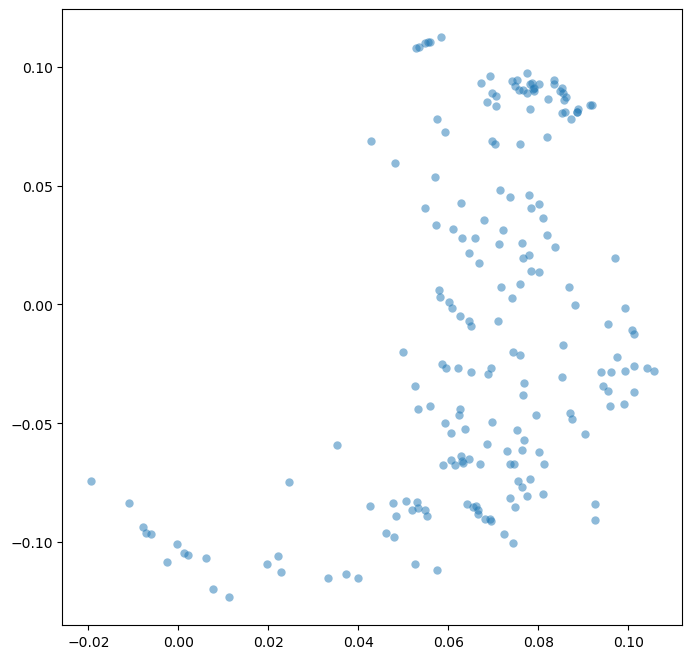

In [69]:
df_clean = df[(df["start"] < 40000000) | (df["start"] > 41500000)]
df_clean_signals = df_clean.iloc[:, 3:]
scaler = StandardScaler().fit(df_clean_signals)
df_scaled = scaler.transform(df_clean_signals)

pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df_scaled)

plot_pca(pca)

In [74]:

df_clean_signals = df_clean.iloc[:, 3:]

scaler = StandardScaler().fit(df_clean_signals)
df_scaled = scaler.transform(df_clean_signals)
df_scaled_t = df_scaled.T
df_scaled_t



array([[-3.60740225, -3.51431483, -3.60740225, ..., -3.60740225,
        -3.04032001, -3.60740225],
       [-1.14001452, -0.88662152, -1.14001452, ..., -1.14001452,
        -0.88821344, -1.14001452],
       [-0.84734423, -0.84734423, -0.84734423, ..., -0.84734423,
        -0.83501468, -0.84734423],
       ...,
       [-1.08064567, -1.08064567, -1.08064567, ..., -1.08064567,
        -1.08064567, -1.08064567],
       [-2.31019397, -2.31019397, -2.31019397, ..., -2.31019397,
        -2.31019397, -2.31019397],
       [-0.79378598, -0.79378598, -0.79378598, ..., -0.79378598,
        -0.79378598, -0.79378598]])

- How many PCs are needed to explain 90% of the variance in the data? Illustrate this with a scree plot (https://en.wikipedia.org/wiki/Scree_plot). 


In [36]:
df
df_clean = df[(df["start"] < 40000000) | (df["start"] > 41500000)]
df_clean_signals = df_clean.iloc[:, 3:]



ENCFF230YBR  ENCFF953CVO  ENCFF520IHF  ENCFF730SPR  ENCFF559YWA  \
0         0.000000     0.000000     0.000000     0.000000     0.000000   
1         0.016585     0.141369     0.000000     0.092070     0.048068   
2         0.000000     0.000000     0.000000     0.041850     0.010681   
3         0.000000     0.023561     0.000000     0.008370     0.000000   
4         0.049756     0.094244     0.052176     0.442616     0.181287   
...            ...          ...          ...          ...          ...   
13375     0.000000     0.000000     0.000000     0.000000     0.000000   
13376     0.063296     0.094244     0.013765     0.209718     0.074772   
13377     0.000000     0.000000     0.000000     0.015506     0.000000   
13378     0.101037     0.140481     0.009106     0.078761     0.066394   
13379     0.000000     0.000000     0.000000     0.000000     0.000000   

       ENCFF640PJT  ENCFF919FBG  ENCFF141QAK  ENCFF941KEV  ENCFF589QXD  ...  \
0         0.000000     0.000000     0.000000     0.000000     0.000000  ...   
1         0.006080     0.029362     0.000000     0.000000     0.000000  ...   
2         0.000000     0.000000     0.000000     0.000000     0.000000  ...   
3         0.000000     0.000000     0.000000     0.000000     0.000000  ...   
4         0.009625     0.142758     0.057259     0.067355     0.058666  ...   
...            ...          ...          ...          ...          ...  ...   
13375     0.000000     0.000000     0.000000     0.000000     0.000000  ...   
13376     0.006080     0.106795     0.000000     0.000000     0.000000  ...   
13377     0.000000     0.000000     0.010187     0.000000     0.000000  ...   
13378     0.000000     0.018634     0.000000     0.000000     0.013844  ...   
13379     0.000000     0.000000     0.000000     0.000000     0.000000  ...   

       ENCFF418EBS  ENCFF270BHF  ENCFF365EIN  ENCFF321AHD  ENCFF595QZS  \
0         0.000000     0.000000     0.000000     0.000000     0.000000   
1         0.074162     0.033137     0.105691     0.000000     0.000000   
2         0.018541     0.000000     0.000000     0.000000     0.000000   
3         0.000000     0.000000     0.000000     0.000000     0.000000   
4         0.055622     0.234655     0.156918     0.072464     0.028221   
...            ...          ...          ...          ...          ...   
13375     0.000000     0.000000     0.000000     0.000000     0.000000   
13376     0.217829     0.159084     0.014484     0.000000     0.000000   
13377     0.000000     0.013125     0.000000     0.000000     0.000000   
13378     0.120245     0.058105     0.300129     0.000000     0.000000   
13379     0.000000     0.000000     0.000000     0.000000     0.000000   

       ENCFF303MWS  ENCFF907FVJ  ENCFF567WCU  ENCFF423TVA  ENCFF308KWQ  
0         0.000000     0.000000     0.000000     0.000000          0.0  
1         0.045821     0.034791     0.000000     0.000000          0.0  
2         0.000000     0.000000     0.000000     0.000000          0.0  
3         0.000000     0.000000     0.000000     0.000000          0.0  
4         0.274925     0.138100     0.025495     0.073522          0.0  
...            ...          ...          ...          ...          ...  
13375     0.000000     0.000000     0.000000     0.000000          0.0  
13376     0.130731     0.072167     0.000000     0.000000          0.0  
13377     0.000000     0.000000     0.000000     0.000000          0.0  
13378     0.080950     0.088405     0.000000     0.000000          0.0  
13379     0.000000     0.000000     0.000000     0.000000          0.0  

[13229 rows x 200 columns]

The number of PCs are: 37


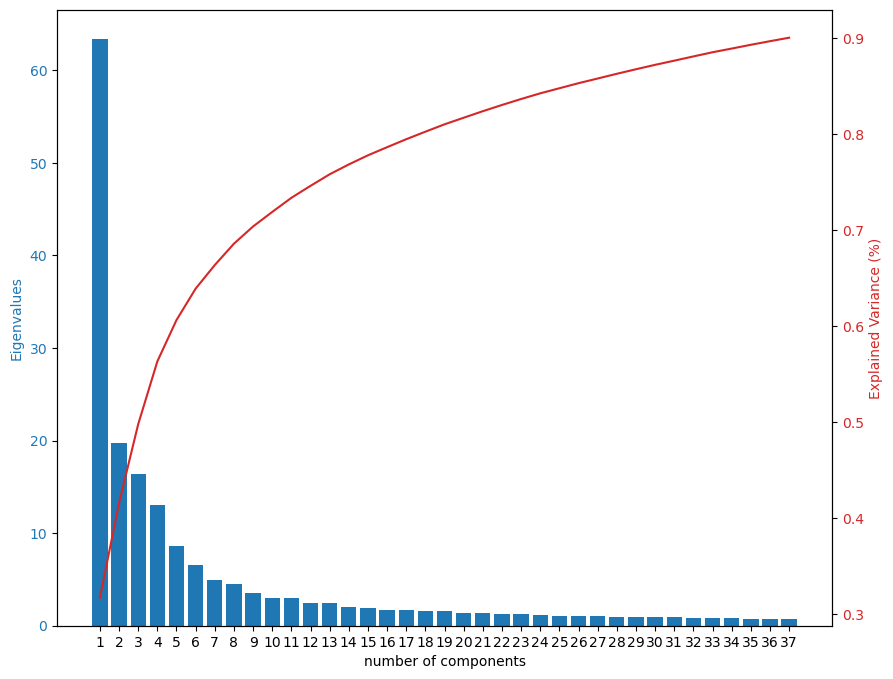

In [40]:
df_clean = df[(df["start"] < 40000000) | (df["start"] > 41500000)]
df_clean_signals = df_clean.iloc[:, 3:]
scaler = StandardScaler().fit(df_clean_signals)
df_scaled = scaler.transform(df_clean_signals)

n_components = 1
pca = PCA(n_components)
pca.fit(df_scaled)
explained = [np.sum(pca.explained_variance_ratio_)]
while explained[-1] < 0.90:
    n_components += 1
    pca = PCA(n_components)
    pca.fit(df_scaled)
    explained.append(np.sum(pca.explained_variance_ratio_))

X = np.arange(1, n_components + 1) 
color = 'tab:blue'
fig, ax1 = plt.subplots(figsize = (10, 8))
ax1.bar(X, pca.explained_variance_, color = color)
ax1.set(xlabel = "number of components", xticks = list(np.arange(1, n_components + 1)))
ax1.set_ylabel("Eigenvalues", color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(X, explained, color = color)
ax2.set_ylabel('Explained Variance (%)', color = color)
ax2.tick_params(axis = 'y', labelcolor = color)

print("The number of PCs are:", n_components)
plt.show()

<span style='color:Blue'> 
    37 PCs are needed to to explain 90% of the variance in the data.
</span>

- How different is the dimensionality reduction into two dimensions for PCA from that obtained using MDS (multi-dimensional scaling)? What methods could be used to determine the similarity? Illustrate with a plot.


- Would non-negative matrix factorization (https://en.wikipedia.org/wiki/Non-negative_matrix_factorization) be a useful method to use for this dataset? Why or why not?  (No plots needed for this question).
